# Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time


In [3]:
cocacola = pd.read_excel("C:\\Excelr Data\\Assignments\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
cocacola.shape

(42, 2)

In [5]:
quarters =['q1','q2','q3','q4']

In [6]:
quarters=quarters*11    # remove last 2 elements 
#quarters

In [7]:
res = quarters[: len(quarters) - 2] 
quarters1=pd.DataFrame(res)
quarters1.shape

(42, 1)

In [8]:
cocacola['quarters']=quarters1

In [9]:
quarters_dummies = pd.DataFrame(pd.get_dummies(cocacola['quarters']))
quarters_dummies

,q1,q2,q3,q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [10]:
cocacola = pd.concat([cocacola,quarters_dummies],axis = 1)

In [11]:
cocacola.head()

,Quarter,Sales,quarters,q1,q2,q3,q4
0,Q1_86,1734.827000,q1,1,0,0,0
1,Q2_86,2244.960999,q2,0,1,0,0
2,Q3_86,2533.804993,q3,0,0,1,0
3,Q4_86,2154.962997,q4,0,0,0,1
4,Q1_87,1547.818996,q1,1,0,0,0


In [12]:
cocacola["t"] = np.arange(1,43)

In [13]:
cocacola["t_squared"] = cocacola["t"]*cocacola["t"]
cocacola.columns

Index(['Quarter', 'Sales', 'quarters', 'q1', 'q2', 'q3', 'q4', 't',
       't_squared'],
      dtype='object')

In [14]:
cocacola["log_Sales"] = np.log(cocacola["Sales"])

In [15]:
cocacola.head()

,Quarter,Sales,quarters,q1,q2,q3,q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,q1,1,0,0,0,5,25,7.344602


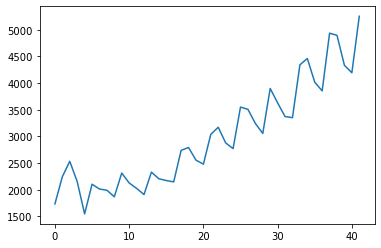

In [16]:
cocacola.Sales.plot()

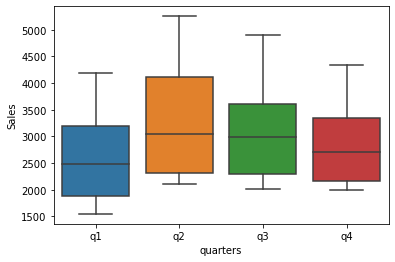

In [17]:
# Boxplot for ever
sns.boxplot(x="quarters",y="Sales",data=cocacola)


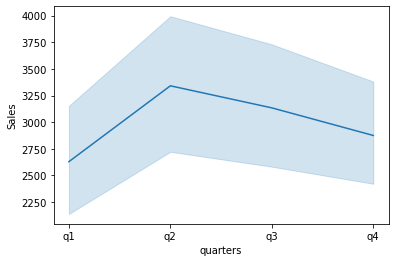

In [18]:
# Line plot for Ridership based on year
sns.lineplot(x="quarters",y="Sales",data=cocacola)


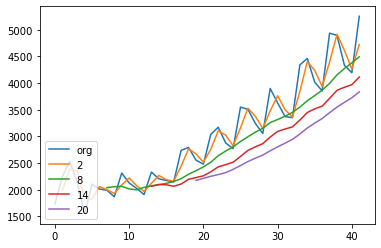

In [19]:
# Centering moving average for the time series to understand better about the trend character in Plastic
cocacola.Sales.plot(label="org")
for i in range(2,24,6):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


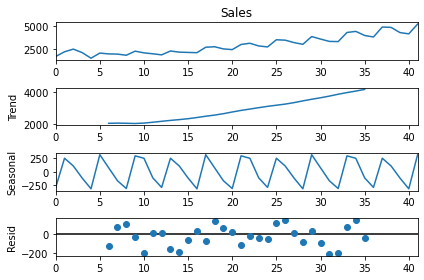

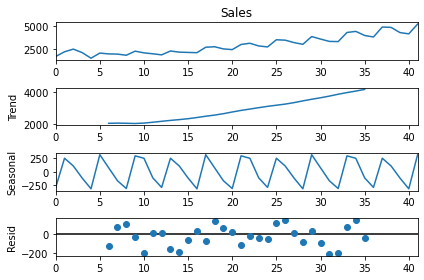

In [20]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(cocacola.Sales,model="additive",freq=12)
decompose_ts_add.plot()


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


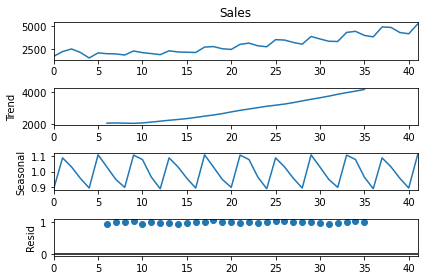

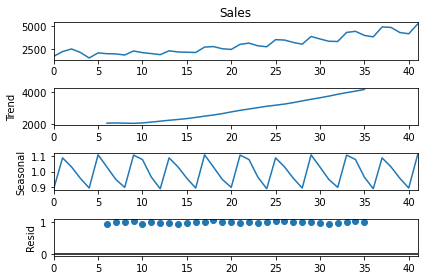

In [21]:
# Time series decomposition plot 
decompose_ts_mul = seasonal_decompose(cocacola.Sales,model="multiplicative",freq=12)
decompose_ts_mul.plot()

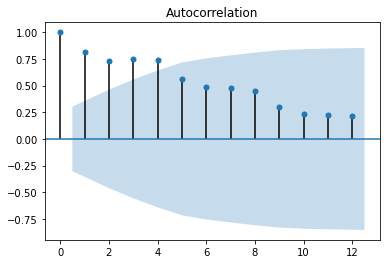

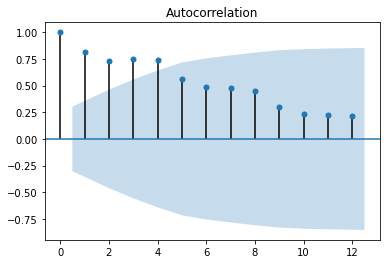

In [22]:
# ACF plots on Original data sets 
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)


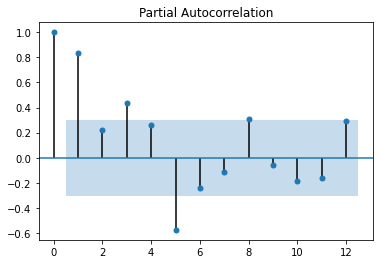

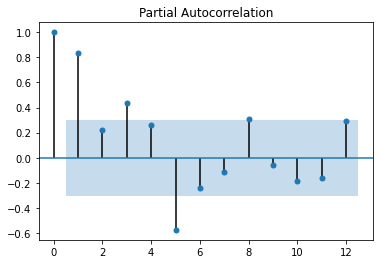

In [23]:
# PACF plots on Original data sets
tsa_plots.plot_pacf(cocacola.Sales,lags=12)


In [24]:
Train = cocacola.head(33)
Test = cocacola.tail(7)

In [25]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

805.0967734947598

In [26]:
##################### Exponential ##############################

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

619.6254887247743

In [27]:
#################### Quadratic ###############################

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

410.2159083653023

In [28]:
################### Additive seasonality ########################

add_sea = smf.ols('Sales~q1+q2+q3+q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['q1','q2','q3','q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1949.25411653479

In [29]:
################# Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Sales~t+t_squared+q1+q2+q3+q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['q1','q2','q3','q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

237.4282121841329

In [30]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Sales~q1+q2+q3+q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2011.5482671382254

In [31]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_Sales~t+q1+q2+q3+q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

437.8331557702503

In [32]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
"rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                               rmse_Mult_add_sea])}


In [33]:
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,805.096773
1,rmse_Exp,619.625489
2,rmse_Quad,410.215908
3,rmse_add_sea,1949.254117
4,rmse_add_sea_quad,237.428212
5,rmse_Mult_sea,2011.548267
6,rmse_Mult_add_sea,437.833156


In [34]:
#Predicting new values 

model_full = smf.ols('Sales~t+t_squared+q1+q2+q3+q4',data = Train).fit()
pred_new  = pd.Series(Mul_Add_sea.predict(Test))


In [35]:
pred_new1=np.exp(pred_new)

pred_new1

35    3699.525736
36    3471.725081
37    4381.727719
38    4336.629129
39    4036.402108
40    3787.858075
41    4780.724953
dtype: float64

In [36]:
Test["forecasted_Sales"] = pd.Series(pred_new1)
Test

C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Quarter,Sales,quarters,q1,q2,q3,q4,t,t_squared,log_Sales,forecasted_Sales
35,Q4_94,4017.0,q4,0,0,0,1,36,1296,8.298291,3699.525736
36,Q1_95,3854.0,q1,1,0,0,0,37,1369,8.256867,3471.725081
37,Q2_95,4936.0,q2,0,1,0,0,38,1444,8.504311,4381.727719
38,Q3_95,4895.0,q3,0,0,1,0,39,1521,8.495970,4336.629129
39,Q4_95,4333.0,q4,0,0,0,1,40,1600,8.374015,4036.402108
40,Q1_96,4194.0,q1,1,0,0,0,41,1681,8.341410,3787.858075
41,Q2_96,5253.0,q2,0,1,0,0,42,1764,8.566555,4780.724953


In [37]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [38]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


23.056515707089208

In [39]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 


13.868154919528815

In [40]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


10.101238584050453

In [41]:
hwe_model_add_add = ExponentialSmoothing(cocacola["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = cocacola.index[0],end = cocacola.index[-1])


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [42]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 


10.460397686578812

In [43]:
# Lets us use auto_arima from p
from pmdarima.arima import auto_arima

In [44]:
auto_arima_model = auto_arima(Train["Sales"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)
       

Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=281.121, BIC=283.113, Time=0.032 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=280.321, BIC=283.308, Time=0.329 seconds
Fit ARIMA(0,1,0)x(0,1,2,12) [intercept=True]; AIC=282.035, BIC=286.018, Time=0.814 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=280.164, BIC=283.151, Time=0.269 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=281.989, BIC=285.972, Time=0.512 seconds
Fit ARIMA(0,1,0)x(1,1,2,12) [intercept=True]; AIC=283.866, BIC=288.844, Time=1.606 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=281.600, BIC=285.582, Time=1.334 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=283.793, BIC=288.771, Time=1.724 seconds
Fit ARIMA(0,1,0)x(2,1,2,12) [intercept=True]; AIC=285.723, BIC=291.698, Time=1.825 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=283.107, BIC=286.094, Time=0.166 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=282.232, BIC=286.214, Time=0.445 seconds

Fit ARIMA(4,1,0)x(0,1,0,12) [intercept=True]; AIC=286.232, BIC=292.206, Time=0.391 seconds
Fit ARIMA(4,1,0)x(0,1,1,12) [intercept=True]; AIC=283.190, BIC=290.160, Time=0.919 seconds
Fit ARIMA(4,1,0)x(1,1,0,12) [intercept=True]; AIC=281.822, BIC=288.792, Time=1.071 seconds
Fit ARIMA(4,1,1)x(0,1,0,12) [intercept=True]; AIC=287.379, BIC=294.350, Time=0.572 seconds
Fit ARIMA(5,1,0)x(0,1,0,12) [intercept=True]; AIC=287.895, BIC=294.865, Time=0.483 seconds
Total fit time: 104.160 seconds


In [45]:
auto_arima_model.summary() # SARIMAX(1, 1, 1)x(0, 1, 1, 12)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   33
Model:             SARIMAX(0, 1, 4)x(1, 1, [], 12)   Log Likelihood                -132.973
Date:                             Sat, 18 Jul 2020   AIC                            279.945
Time:                                     16:42:47   BIC                            286.915
Sample:                                          0   HQIC                           281.306
                                              - 33                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     69.6109     35.729      1.948      0.051      -0.416     139.638
ma.L1         -0.2601     64.662     -0.004      0.997    -126.995     126.474
ma.L2         -0.6719     22.189     -0.030      0.976     -44.162      42.818
ma.L3         -0.2626     65.760     -0.004      0.997    -129.149     128.624
ma.L4          0.9969     65.510      0.015      0.988    -127.400     129.394
ar.S.L12      -0.7320      0.212     -3.453      0.001      -1.147      -0.317
sigma2      1.579e+04   1.03e+06      0.015      0.988      -2e+06    2.03e+06
===================================================================================
Ljung-Box (Q):                       17.36   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.57   Prob(JB):                         0.87
Heteroskedasticity (H):               0.41   Skew:                             0.23
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# For getting Fitted values for train data set we use 
# predict_in_sample() function 
auto_arima_model.predict_in_sample( )


array([  40.19100596, 1770.30564464, 2247.39979132, 2538.97025186,
       2206.00958317, 1616.81659406, 2182.50151654, 2035.23481674,
       1989.76946173, 1930.34688573, 2376.94896001, 2183.83584584,
       2944.45941696, 2438.57484244, 2712.37026534, 2046.55190367,
       1833.22373634, 2601.58584166, 2258.53064395, 2681.27383876,
       2444.88359309, 2832.6038067 , 3330.78400761, 2778.93184397,
       2714.72377203, 3418.51928681, 3653.95821426, 3277.45236165,
       2936.84605132, 3812.79955413, 3746.88082839, 3535.31750325,
       3497.30453621])

In [47]:
# For getting predictions for future we use predict() function 
pred_test = pd.Series(auto_arima_model.predict(n_periods=7))


In [48]:
# Adding the index values of Test Data set to predictions of Auto Arima
pred_test.index = Test.index
MAPE(pred_test,Test.Sales) 

10.598566731493051

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model = SARIMAX(Train['Sales'],order=(1,1,0),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -224.091
Date:                              Sat, 18 Jul 2020   AIC                            456.182
Time:                                      16:42:47   BIC                            462.045
Sample:                                           0   HQIC                           458.126
                                               - 33                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0734      0.181     -0.406      0.685      -0.428       0.281
ar.S.L12       0.9984      0.014     71.965      0.000       0.971       1.026
ma.S.L12      -0.9088      0.387     -2.348      0.019      -1.668      -0.150
sigma2      3.408e+04   1.18e-05   2.88e+09      0.000    3.41e+04    3.41e+04
===================================================================================
Ljung-Box (Q):                       54.02   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.01   Prob(JB):                         0.50
Heteroskedasticity (H):               0.91   Skew:                             0.10
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.65e+24. Standard errors may be unstable.
"""

In [51]:
# Obtain predicted values
start=len(Train)
end=len(Train)+len(Test)-1
srma_pred = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,0,1,12) Predictions')
srma_pred


33    3773.414799
34    3752.222214
35    3582.594191
36    3510.729578
37    4020.919707
38    4056.044005
39    3855.146151
Name: SARIMA(1,1,0)(1,0,1,12) Predictions, dtype: float64

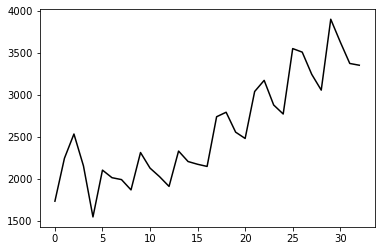

In [52]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")


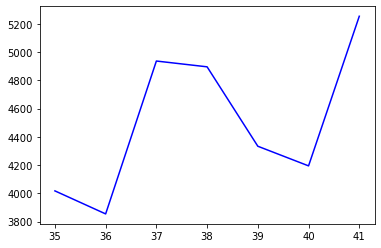

In [53]:
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")


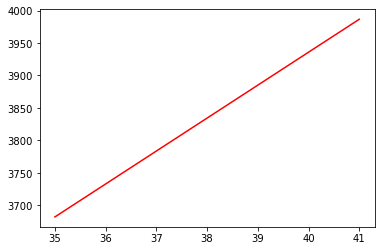

In [54]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")


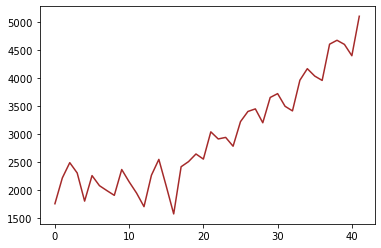

In [55]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")


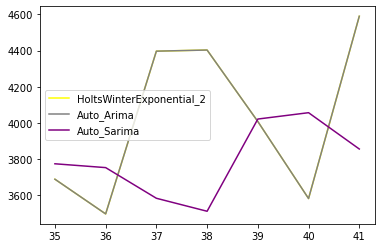

In [56]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="grey")
plt.plot(pred_hwe_mul_add.index,srma_pred,label="Auto_Sarima",color="purple")
plt.legend(loc='best')
